Flight Price Prediction

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset from excel
data=pd.read_excel(r"C:\Users\sanka\Downloads\Compressed\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx",sheet_name='Sheet1')
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [3]:
data.tail()

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

Initial Observations from the dataset

1.The dataset is consist of both numerical and catagorical data columns. We need to encoe the columns having catagorical data.

2.Most of the columns are in object format.

In [4]:
#displaying all the columns in the dataset
pd. set_option("display.max_columns", None)

#displaying all the rows in the dataset
pd.set_option("display.max_rows",None)

In [5]:
#importing the testing data from excel
data_test=pd.read_excel(r"C:\Users\sanka\Downloads\Compressed\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx",sheet_name='Sheet1')
data_test.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [6]:
data_test.tail()

Airline Date_of_Journey   Source Destination            Route  \
2666          Air India       6/06/2019  Kolkata    Banglore  CCU → DEL → BLR   
2667             IndiGo      27/03/2019  Kolkata    Banglore        CCU → BLR   
2668        Jet Airways       6/03/2019    Delhi      Cochin  DEL → BOM → COK   
2669          Air India       6/03/2019    Delhi      Cochin  DEL → BOM → COK   
2670  Multiple carriers      15/06/2019    Delhi      Cochin  DEL → BOM → COK   

     Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  
2666    20:30  20:25 07 Jun  23h 55m      1 stop         No info  
2667    14:20         16:55   2h 35m    non-stop         No info  
2668    21:50  04:25 07 Mar   6h 35m      1 stop         No info  
2669    04:00         19:15  15h 15m      1 stop         No info  
2670    04:55         19:15  14h 20m      1 stop         No info

In [7]:
#importing the predicted  data from excel
predicted_data=pd.read_excel(r"C:\Users\sanka\Downloads\Compressed\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx",sheet_name='Sheet1')
predicted_data.head()

Price
0  15998
1  16612
2  25572
3  25778
4  16934

# Exploratory Data Analysis(EDA)

In [8]:
#finding number of rows and columns
data.shape

(10683, 11)

The dataset has 10683 rows and 10 columns

In [9]:

#finding the null values in each column
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

The dataset has two columns, 'Route' and 'Total_Stops' having null values. lets fill the null values.

In [10]:
# Imputing columns having null values

#imputing Route feature null values
data['Route'].fillna(data['Route'].mode()[0], inplace=True)

#imputing Total_Stops feature null values
data['Total_Stops'].fillna(data['Total_Stops'].mode()[0], inplace=True)

Lets check whether the null values are removed.




In [11]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

All the null values are filled


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


The dataset only has one column having integer values which is the taget variable in this analysis(Price) and rest all the columns have object(string) values. We need to convert the object values into numbers for better analysis. 

In [13]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

As most of  the columns have object(string) values so here only statistics of one column is printed which has numeric value.

We can observe that the difference between the mean and standard deviation is not much. The standard deviation is nearly 50% of the mean..

There is adequate difference between all the quantiles.



In [14]:
# lets check the number of unique values in each column
data.nunique().to_frame("Unique values")

Unique values
Airline                     12
Date_of_Journey             44
Source                       5
Destination                  6
Route                      128
Dep_Time                   222
Arrival_Time              1343
Duration                   368
Total_Stops                  5
Additional_Info             10
Price                     1870

We have found out the number of unique values in each column , now lets find out the type of catagorical values in each column for selecting the proper encoding technique.

Lets split the dataset into numerical and catagorical columns for better analysis.

In [15]:
#lets check if the column were renamed.
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
# now lets check for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Price']


In [17]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)



['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [18]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

We need to break the column 'Date_of_Journey' into three different columns having month and year for converting the object datatype values into numerical values.

We need to break the columns 'Dep_Time' and 'Arrival_Time' into two different columns having hours and minutes for converting the object datatype values into numerical values.

We need to Break the column 'Duration' into two different columns having hour and minutes for converting the object datatype values into numerical values.



In [19]:
#breaking the column 'Date_of_Journey' into three different columns having month and year.
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Year_of_Journey']=data['Date_of_Journey'].dt.year
data['Month_of_Journey']=data['Date_of_Journey'].dt.month
data['Day_of_Journey']=data['Date_of_Journey'].dt.day


In [20]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Year_of_Journey  Month_of_Journey  Day_of_Journey  
0             2019                 3              24  
1             2019                 1               5  
2             2019                 9               6  
3             2019                12               5  
4             2019                 1               3

lets drop the column 'Date_of_Journey' as we have divided it into three differnt columns already.

In [21]:
data=data.drop(['Date_of_Journey'],axis=1)

In [22]:
data.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Year_of_Journey  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897             2019   
1         13:15   7h 25m     2 stops         No info   7662             2019   
2  04:25 10 Jun      19h     2 stops         No info  13882             2019   
3         23:30   5h 25m      1 stop         No info   6218             2019   
4         21:35   4h 45m      1 stop         No info  13302             2019   

   Month_of_Journey  Day_of_Journey  
0                 3              24  
1                 1               5  
2                 9               6  
3                12               5  
4                 1               3

In [23]:
#breaking the columns 'Dep_Time' and 'Arrival_Time' into two different columns having hours and minutes.
data['Departure_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Departure_min']=pd.to_datetime(data['Dep_Time']).dt.minute

data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute


In [24]:
#now lets delete the columns 'Dep_Time' and 'Arrival_Time'
data=data.drop(['Dep_Time','Arrival_Time'],axis=1)
data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Year_of_Journey  Month_of_Journey  \
0    non-stop         No info   3897             2019                 3   
1     2 stops         No info   7662             2019                 1   
2     2 stops         No info  13882             2019                 9   
3      1 stop         No info   6218             2019                12   
4      1 stop         No info  13302             2019                 1   

   Day_of_Journey  Departure_hour  Departure_min  Arrival_hour  Arrival_min  
0              24              22             20             1           10  
1               5               5             50            13           15  
2               6               9             25             4           25  
3               5              18              5            23           30  
4               3              16             50            21           35

In [25]:
#breaking the column 'Duration' into two different columns having hour and minutes
duration = list(data["Duration"])

#Checking if duration contains only hours or mins
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []

#extracting mins and hours from duration
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   
    
    
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

  

In [26]:
#now lets delete the columns'Duration'
data=data.drop(['Duration'],axis=1)
data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Year_of_Journey  Month_of_Journey  Day_of_Journey  \
0         No info   3897             2019                 3              24   
1         No info   7662             2019                 1               5   
2         No info  13882             2019                 9               6   
3         No info   6218             2019                12               5   
4         No info  13302             2019                 1               3   

   Departure_hour  Departure_min  Arrival_hour  Arrival_min  Duration_hours  \
0              22             20             1           10               2   
1               5             50            13           15               7   
2               9             25             4           25              19   
3              18              5            23           30               5   
4              16             50            21           35               4   

   Duration_mins  
0             50  
1             25  
2              0  
3             25  
4             45

In [27]:
data.shape

(10683, 16)

In [28]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [29]:
# lets again check the number of unique values in each column
data.nunique().to_frame("Unique values")

Unique values
Airline                      12
Source                        5
Destination                   6
Route                       128
Total_Stops                   5
Additional_Info              10
Price                      1870
Year_of_Journey               1
Month_of_Journey              7
Day_of_Journey                9
Departure_hour               24
Departure_min                12
Arrival_hour                 24
Arrival_min                  12
Duration_hours               44
Duration_mins                12

In [30]:
# lets check the value counts of each type in each catagorical column
for d in data[categorical_col].columns:
        print(data[d].value_counts())
        print('-'*200)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------------------------------------

For a better understanding lets plot the count plot for columns having catagorical values.

In [31]:
def value_counts(column):
    counts=len(data[column].value_counts())
    if counts<5:
        plt.figure(figsize=(5,5))
    elif counts<10:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)    
    else:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=data)
    plt.show()
    print("*"*200)


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


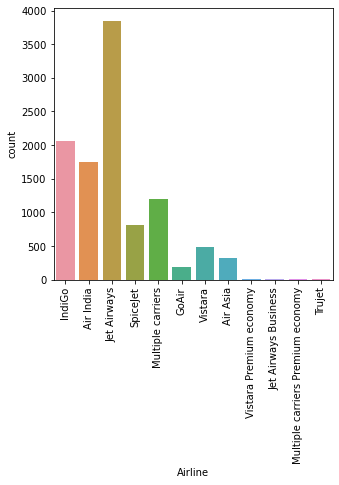

********************************************************************************************************************************************************************************************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


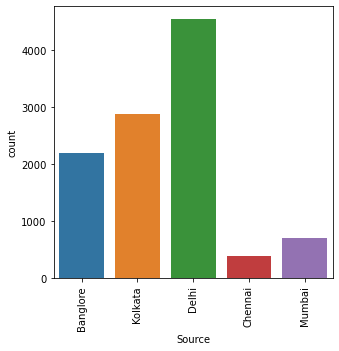

********************************************************************************************************************************************************************************************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


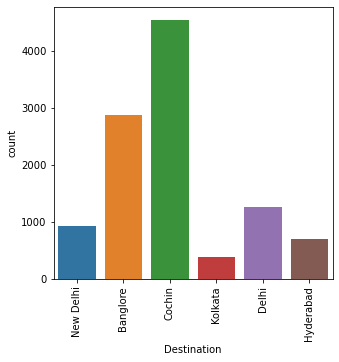

********************************************************************************************************************************************************************************************************
DEL → BOM → COK                      2377
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
D

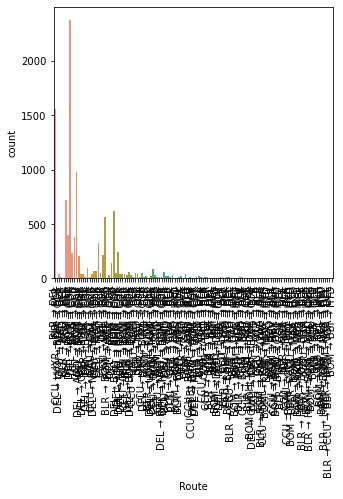

********************************************************************************************************************************************************************************************************
1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


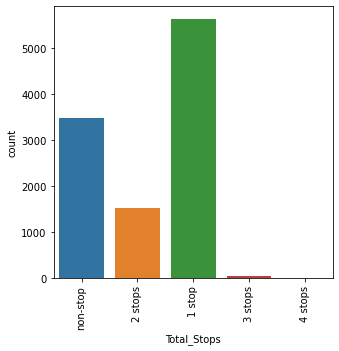

********************************************************************************************************************************************************************************************************
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


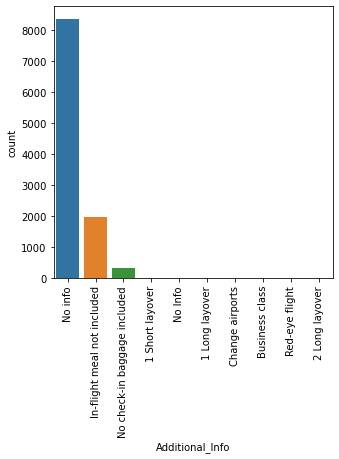

********************************************************************************************************************************************************************************************************


In [32]:
countplots=data.iloc[:,[0,1,2,3,4,5]]
for i in countplots:
    print(countplots[i].value_counts())
    value_counts(i)

Observation from the countplots

1.Jet airways is the most preferd airline by consumers and Trujet is the least preferred airline by consumers.

2.The source of most flights is from Delhi and cochin is the most preferred destination.

3.Most flights has 1 stop between it's source and destination.

4.There is only one flight which has 4 stops between its source and destination.

5.In maximum flights their is no addtional information mentioned.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10683 non-null  object
 4   Total_Stops       10683 non-null  object
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   Year_of_Journey   10683 non-null  int64 
 8   Month_of_Journey  10683 non-null  int64 
 9   Day_of_Journey    10683 non-null  int64 
 10  Departure_hour    10683 non-null  int64 
 11  Departure_min     10683 non-null  int64 
 12  Arrival_hour      10683 non-null  int64 
 13  Arrival_min       10683 non-null  int64 
 14  Duration_hours    10683 non-null  int64 
 15  Duration_mins     10683 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.3+ MB


In [34]:
#now lets delete the columns'Year_of_Journey'as it has only one value 2019
data=data.drop(['Year_of_Journey'],axis=1)
data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Month_of_Journey  Day_of_Journey  Departure_hour  \
0         No info   3897                 3              24              22   
1         No info   7662                 1               5               5   
2         No info  13882                 9               6               9   
3         No info   6218                12               5              18   
4         No info  13302                 1               3              16   

   Departure_min  Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             20             1           10               2             50  
1             50            13           15               7             25  
2             25             4           25              19              0  
3              5            23           30               5             25  
4             50            21           35               4             45

Lets Encode the Catagorical columns with Object(string) values.


In [35]:
print("number of catagorical columns are ", len(categorical_col))

number of catagorical columns are  6


In [36]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [37]:
#encoding the catagorical columns.
data[categorical_col]=data[categorical_col].apply(lab_enc.fit_transform)
data[categorical_col]



Airline  Source  Destination  Route  Total_Stops  Additional_Info
0            3       0            5     18            4                8
1            1       3            0     84            1                8
2            4       2            1    118            1                8
3            3       3            0     91            0                8
4            3       0            5     29            0                8
5            8       3            0     64            4                8
6            4       0            5      5            0                5
7            4       0            5      5            0                8
8            4       0            5      5            0                5
9            6       2            1    104            0                8
10           1       2            1    103            0                8
11           3       3            0     64            4                8
12           1       1            4    127            4                8
13           4       3            0     66            0                5
14           3       3            0     64            4                8
15           1       2            1     97            1                8
16           8       2            1    123            0                8
17           4       2            1    104            0                5
18           1       2            1    105            1                8
19           4       2            1    104            0                5
20           2       2            1    104            0                8
21           1       0            5     17            0                8
22           3       0            2     18            4                8
23           3       0            2     18            4                8
24           4       3            0     66            0                5
25           4       2            1    113            1                8
26           3       2            1    119            0                8
27           2       2            1    104            0                8
28          10       0            2     18            4                8
29          10       1            4    127            4                8
30          10       1            4    127            4                8
31           1       3            0     78            1                8
32           3       0            2     18            4                8
33           4       2            1    122            1                5
34           4       2            1    104            0                5
35           3       2            1    104            0                8
36           8       3            0     90            0                8
37           1       3            0     64            4                8
38           4       0            5      5            0                8
39           4       2            1    104            0                8
40           6       2            1    111            0                8
41           1       0            5      5            0                8
42           4       2            1    104            0                5
43           0       0            2     18            4                8
44           6       2            1    104            0                8
45           8       0            5     18            4                7
46           3       0            2     18            4                8
47           1       1            4    127            4                8
48           1       3            0     80            0                8
49           4       2            1     97            1                5
50           4       2            1    106            4                5
51           4       3            0     73            0                8
52           3       0            5     18            4                8
53           3       0            2     18            4          

In [38]:
data.head()

Airline  Source  Destination  Route  Total_Stops  Additional_Info  Price  \
0        3       0            5     18            4                8   3897   
1        1       3            0     84            1                8   7662   
2        4       2            1    118            1                8  13882   
3        3       3            0     91            0                8   6218   
4        3       0            5     29            0                8  13302   

   Month_of_Journey  Day_of_Journey  Departure_hour  Departure_min  \
0                 3              24              22             20   
1                 1               5               5             50   
2                 9               6               9             25   
3                12               5              18              5   
4                 1               3              16             50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0  
3            23           30               5             25  
4            21           35               4             45

In [39]:
data.shape

(10683, 15)

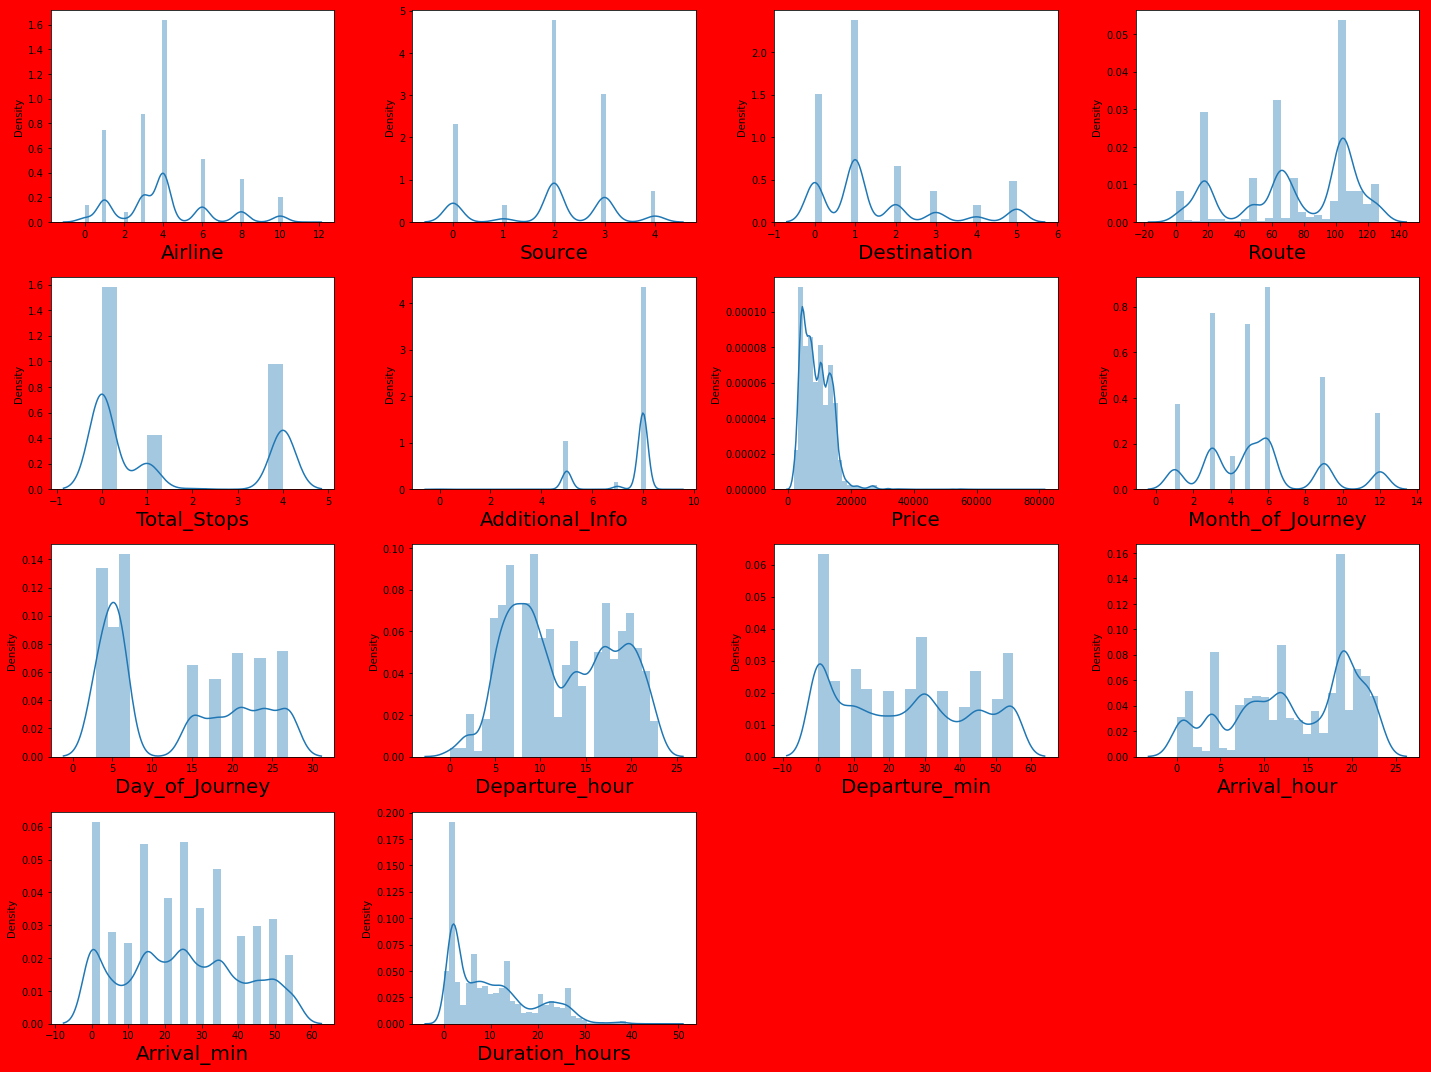

In [40]:
# now the data looks good and there is no missing values and Object values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Price column is the only feature having continious data here, so we only consider the price column. It is also the Label for this analysis. The distribution looks a little skewed towards the right side.

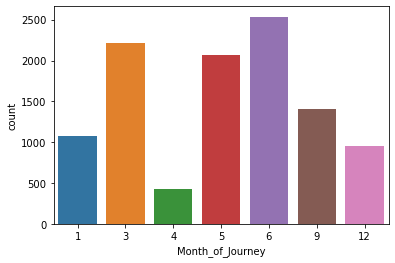

In [41]:
#Lets plot some more count plots

#lets plot the value counts for Month_of_Journey
sns.countplot(x='Month_of_Journey', data=data, )
plt.show()

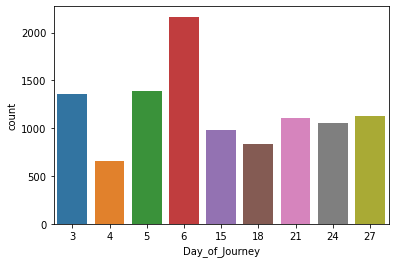

In [42]:
#lets plot the value counts for Day_of_Journey
sns.countplot(x='Day_of_Journey', data=data, )
plt.show()

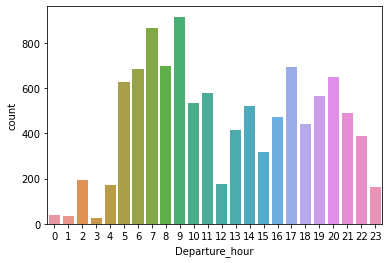

In [43]:
#lets plot the value counts for Departure_hour
sns.countplot(x='Departure_hour', data=data, )
plt.show()

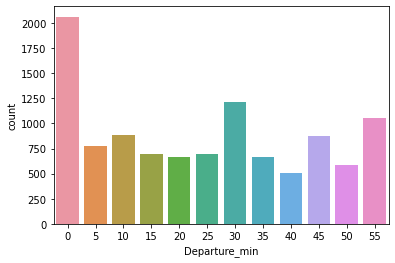

In [44]:
#lets plot the value counts for Departure_min
sns.countplot(x='Departure_min', data=data, )
plt.show()

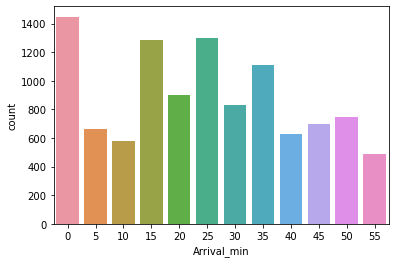

In [45]:
#lets plot the value counts for Arrival_min
sns.countplot(x='Arrival_min', data=data, )
plt.show()

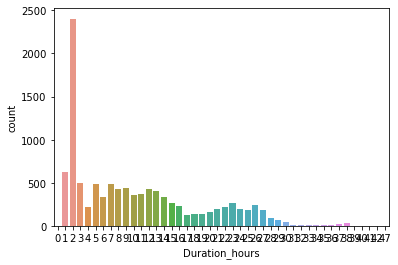

In [46]:
#lets plot the value counts for Duration_hours
sns.countplot(x='Duration_hours', data=data, )
plt.show()

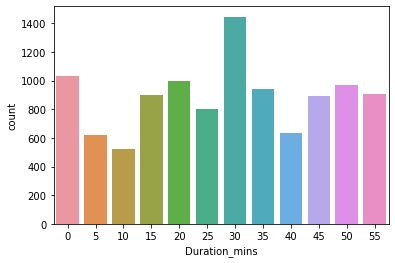

In [47]:
#lets plot the value counts for Duration_mins
sns.countplot(x='Duration_mins', data=data, )
plt.show()

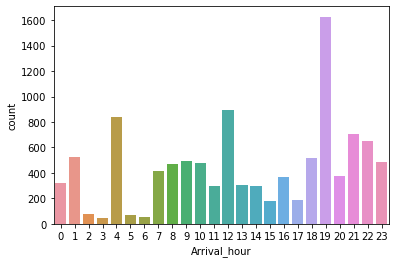

In [48]:
#lets plot the value counts for Arrival_hour
sns.countplot(x='Arrival_hour', data=data, )
plt.show()

In [49]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=data['Price']
x=data.drop(columns=['Price'])

In [50]:
x.head()

Airline  Source  Destination  Route  Total_Stops  Additional_Info  \
0        3       0            5     18            4                8   
1        1       3            0     84            1                8   
2        4       2            1    118            1                8   
3        3       3            0     91            0                8   
4        3       0            5     29            0                8   

   Month_of_Journey  Day_of_Journey  Departure_hour  Departure_min  \
0                 3              24              22             20   
1                 1               5               5             50   
2                 9               6               9             25   
3                12               5              18              5   
4                 1               3              16             50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0  
3            23           30               5             25  
4            21           35               4             45

In [51]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

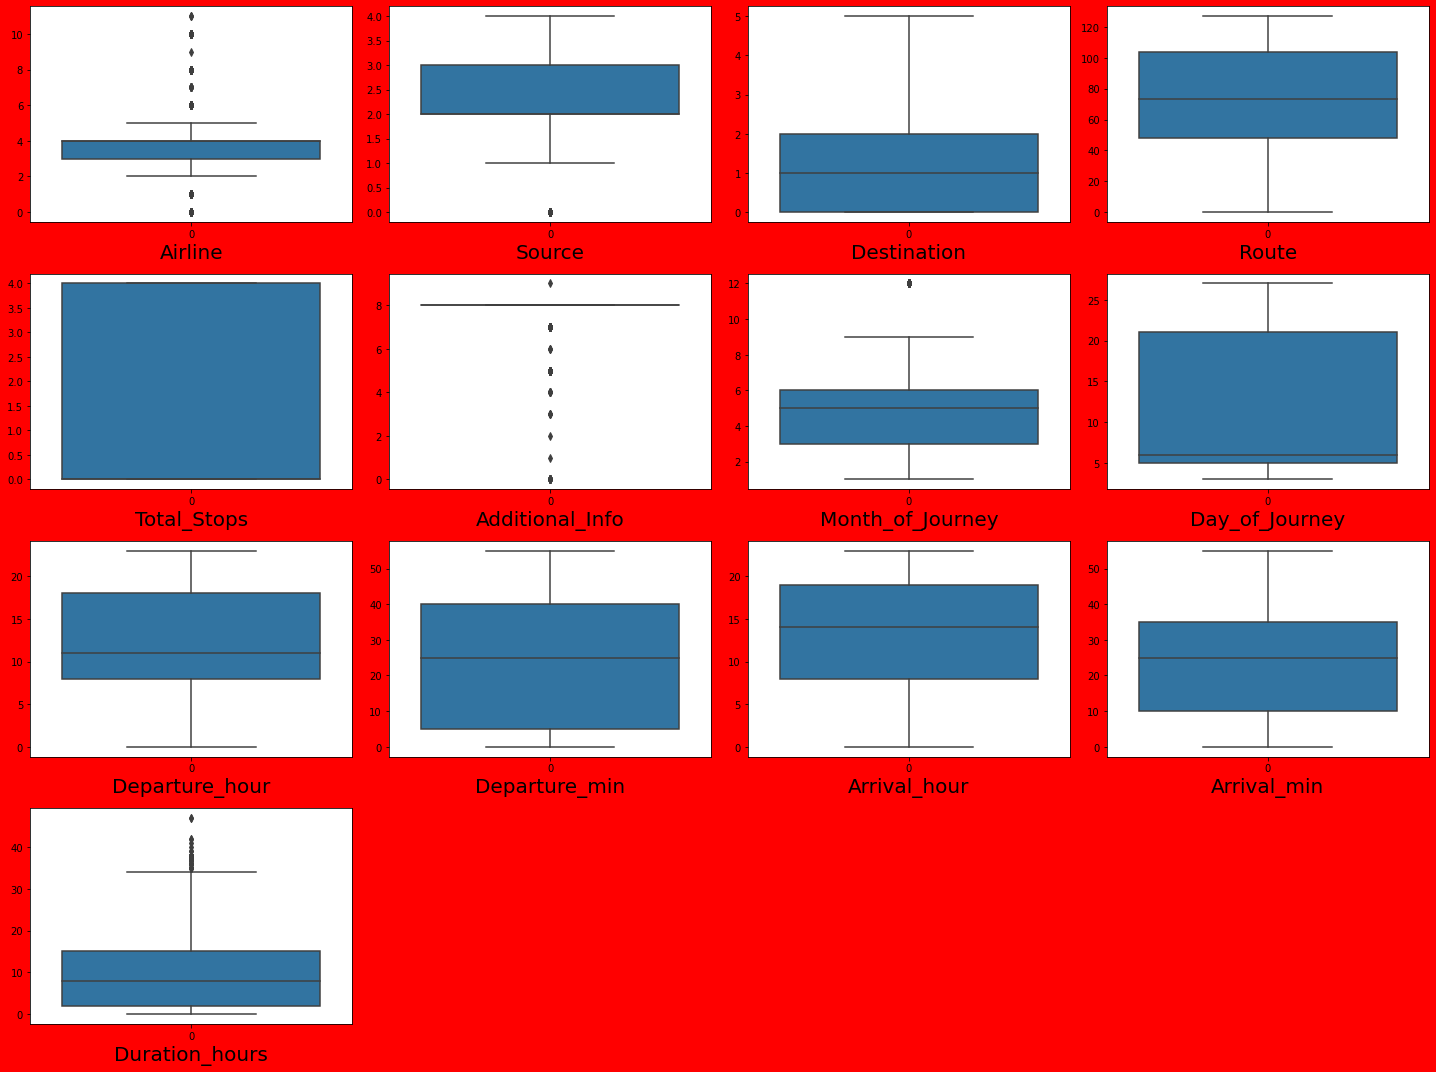

In [52]:
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in x:
    if plotnumber<=13:
        plt.subplot(4,4,plotnumber)
        ax=sns.boxplot(data=x[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Airline, Additional_info, Duration_hour, source and Month_of_journey has outliers, but we dont need to worry about them as all the columns have catagorical data.

In [53]:
#finding the corelation between the features in the data set
data.corr()

Airline    Source  Destination     Route  Total_Stops  \
Airline           1.000000 -0.013401     0.018479  0.025118     0.036064   
Source           -0.013401  1.000000    -0.592574  0.403403    -0.225601   
Destination       0.018479 -0.592574     1.000000 -0.461183     0.337883   
Route             0.025118  0.403403    -0.461183  1.000000    -0.437783   
Total_Stops       0.036064 -0.225601     0.337883 -0.437783     1.000000   
Additional_Info  -0.060802 -0.022107     0.026806  0.035188     0.164009   
Price            -0.039520  0.015998    -0.071112  0.164118    -0.571174   
Month_of_Journey -0.007918  0.063052    -0.105039  0.042204    -0.056524   
Day_of_Journey    0.031218  0.007560    -0.052076  0.096530     0.043907   
Departure_hour   -0.035194  0.059044    -0.072979 -0.075044     0.039268   
Departure_min    -0.060044 -0.056991     0.127892 -0.067984     0.048813   
Arrival_hour     -0.007491  0.025632    -0.039710  0.013851    -0.095598   
Arrival_min      -0.071089  0.021040     0.017196 -0.173345     0.175973   
Duration_hours   -0.158285  0.166109    -0.258459  0.295515    -0.606168   
Duration_mins    -0.028088 -0.145187     0.061214 -0.232364     0.182161   

                  Additional_Info     Price  Month_of_Journey  Day_of_Journey  \
Airline                 -0.060802 -0.039520         -0.007918        0.031218   
Source                  -0.022107  0.015998          0.063052        0.007560   
Destination              0.026806 -0.071112         -0.105039       -0.052076   
Route                    0.035188  0.164118          0.042204        0.096530   
Total_Stops              0.164009 -0.571174         -0.056524        0.043907   
Additional_Info          1.000000 -0.065478         -0.009098       -0.019456   
Price                   -0.065478  1.000000          0.010700       -0.165412   
Month_of_Journey        -0.009098  0.010700          1.000000       -0.264899   
Day_of_Journey          -0.019456 -0.165412         -0.264899        1.000000   
Departure_hour          -0.051010  0.006819          0.028180       -0.002251   
Departure_min           -0.019339 -0.024492          0.002152       -0.016521   
Arrival_hour             0.026173  0.024264         -0.004338       -0.002124   
Arrival_min              0.041311 -0.086155         -0.025786       -0.021424   
Duration_hours          -0.168725  0.508672          0.055568       -0.038081   
Duration_mins            0.046941 -0.124874         -0.018587       -0.007764   

                  Departure_hour  Departure_min  Arrival_hour  Arrival_min  \
Airline                -0.035194      -0.060044     -0.007491    -0.071089   
Source                  0.059044      -0.056991      0.025632     0.021040   
Destination            -0.072979       0.127892     -0.039710     0.017196   
Route                  -0.075044      -0.067984      0.013851    -0.173345   
Total_Stops             0.039268       0.048813     -0.095598     0.175973   
Additional_Info        -0.051010      -0.019339      0.026173     0.041311   
Price                   0.006819      -0.024492      0.024264    -0.086155   
Month_of_Journey        0.028180       0.002152     -0.004338    -0.025786   
Day_of_Journey         -0.002251      -0.016521     -0.002124    -0.021424   
Departure_hour          1.000000      -0.024806      0.005215     0.067909   
Departure_min          -0.024806       1.000000      0.043054    -0.017594   
Arrival_hour            0.005215       0.043054      1.000000    -0.154362   
Arrival_min             0.067909      -0.017594     -0.154362     1.000000   
Duration_hours          0.002783      -0.021946      0.055180    -0.074439   
Duration_mins          -0.023746       0.092548     -0.118345     0.151626   

                  Duration_hours  Duration_mins  
Airline                -0.158285      -0.028088  
Source                  0.166109      -0.145187  
Destination            -0.258459       0.061214  
Route                   0.295515      -0.232364  
Total_

In [54]:
#sorting the correlation values of Price with all the columns
data.corr()['Price'].sort_values()

Total_Stops        -0.571174
Day_of_Journey     -0.165412
Duration_mins      -0.124874
Arrival_min        -0.086155
Destination        -0.071112
Additional_Info    -0.065478
Airline            -0.039520
Departure_min      -0.024492
Departure_hour      0.006819
Month_of_Journey    0.010700
Source              0.015998
Arrival_hour        0.024264
Route               0.164118
Duration_hours      0.508672
Price               1.000000
Name: Price, dtype: float64

Departure_hour,Month_of_Journey,Source,Arrival_hour and Route are weakly corelated to the label(Price) and  Duration_hours is moderately corelated with the label.     

<AxesSubplot:>

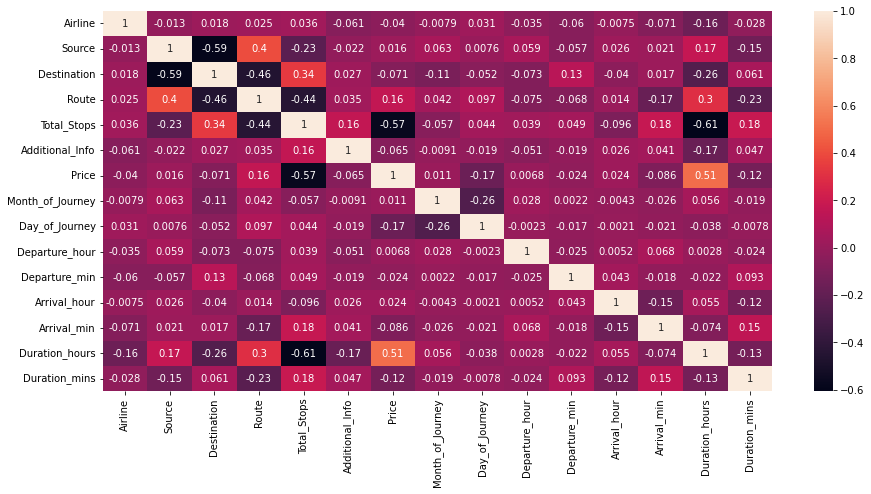

In [55]:
#now lets find out the corelation among the feature(multicolinearity) using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

It seems like the most of features have weak correlation with the label(Price) except Duration_hours. also we can observe that some features have correlation among each other. We will find more about it after finding out he VIF scores for each feature. 

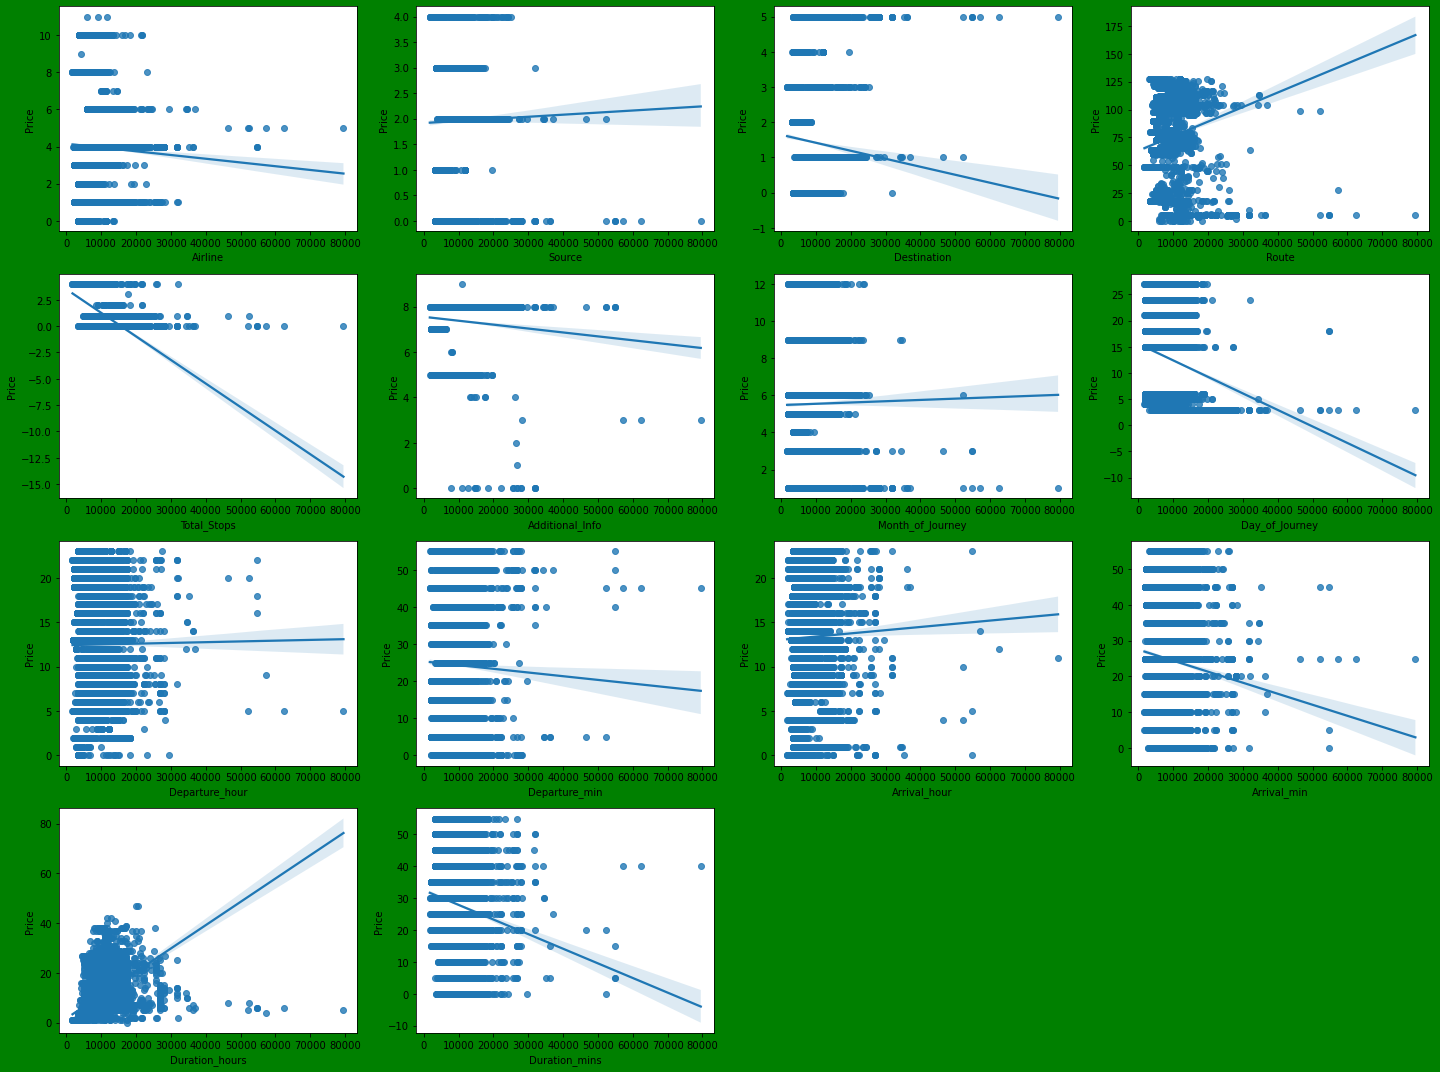

In [56]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Price',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

Observation from the Regplot.

1.Route and Destination_hours are strongly corelated with price.

2.Destination, Duration_min, Arrival_min and total stops are negatively corelated with price.

3.Rest all the features are weakly corelated with the label price as the trend is not completely upward or downward.

In [57]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [58]:
x_scaled.shape[1]

14

Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [59]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

VIF          Features
0   1.053940           Airline
1   1.632424            Source
2   1.830267       Destination
3   1.631306             Route
4   1.895963       Total_Stops
5   1.072981   Additional_Info
6   1.094884  Month_of_Journey
7   1.106896    Day_of_Journey
8   1.032729    Departure_hour
9   1.035676     Departure_min
10  1.050391      Arrival_hour
11  1.104493       Arrival_min
12  1.662397    Duration_hours
13  1.122314     Duration_mins

The vif scores for all the features is below 10. So no features show strong multicolinearity.

Now as the label or the target variable is a continuous data so this is a regression problem. We will be building some regression algorithms for this problem and we will find out the best machine learning model among them.

# Building Machine Learning Models and choosing the best one among them

In [60]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


5914    16079
4299     4878
5767     9314
7473    14781
3417     7514
Name: Price, dtype: int64

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [62]:
regression=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()

In [63]:
models = [regression, knn, svr, rf]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print(y_pred)
    print ('adjusted R2 score for training data------',m.score(x_train, y_train))
    print ('adjusted R2 score for testing data------',m.score(x_test, y_test))
    print ("mean absolute error------",mean_absolute_error(y_test,y_pred))
    print ("mean squared error------",mean_squared_error(y_test,y_pred))
    print ("root mean squared error------",np.sqrt(mean_squared_error(y_test,y_pred)))

LinearRegression()
[ 5336.90644224  5779.18443794  9846.31400569 ...  6707.34050986
 10935.20260719  3881.47424375]
adjusted R2 score for training data------ 0.41901991134051964
adjusted R2 score for testing data------ 0.4175781904974075
mean absolute error------ 2477.217630938326
mean squared error------ 12573896.9742528
root mean squared error------ 3545.9691163704174
KNeighborsRegressor()
[ 4112.2  4830.4  6538.2 ...  7229.  13626.2  2995. ]
adjusted R2 score for training data------ 0.8222450636562215
adjusted R2 score for testing data------ 0.711260795083944
mean absolute error------ 1414.1603893672782
mean squared error------ 6233586.99108948
root mean squared error------ 2496.7152402886236
SVR()
[7780.94322572 7866.97181132 8485.32700355 ... 8011.31475706 8571.40163846
 7977.1634322 ]
adjusted R2 score for training data------ 0.02700896998312652
adjusted R2 score for testing data------ 0.027777114775406786
mean absolute error------ 3487.119569244825
mean squared error------ 20989

After analysing all the models we have concluded that RandomForestRegressor() model gives the best R2 score and based on the R2 score we have chosen RandomForestRegressor() as the best model. We will use RandomForestRegressor() model for further analysis.

Now lets use some Cross validation  and hyperparameter tuning techniques to see whether we can improve the accuracy of our model.

In [64]:
#cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(rf,x_scaled,y,cv=10)

array([0.92105462, 0.87895821, 0.86449387, 0.89262798, 0.93039593,
       0.85290212, 0.89273249, 0.93056648, 0.92129867, 0.79055207])

In [65]:
cross_val_score(RandomForestRegressor(),x_scaled,y,cv=5).mean()

0.8804214261004122

# Hyperparameter Tuning of RandomForestRegressor() model using GridSearchCV

In [66]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'min_samples_split': [2, 5, 10],'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators': [2,5,8,10,17]}

In [67]:
gridsearch=GridSearchCV(estimator=rf , param_grid=param_grid )

In [68]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 5, 8, 10, 17]})

In [69]:
gridsearch.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [70]:
rf=RandomForestRegressor(max_features='sqrt', min_samples_leaf=1,min_samples_split=2,n_estimators=17)

In [71]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=17)

In [72]:
y_pred=rf.predict(x_test)

In [73]:
rf.score(x_test, y_test)


0.8791803362660068

In [74]:
rf.score(x_train,y_train)

0.9751900507778949

The adjusted R2 score has not increased after using hyperparameter tuning

Now lets predict the ticket price from the testing data using RandomForestRegressor() model.

In [75]:
data_test.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [76]:

#finding the null values in each column
data_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [77]:

data_test.shape

(2671, 10)

In [78]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [79]:
#breaking the column 'Date_of_Journey' into three different columns having month and year.
data_test['Date_of_Journey']=pd.to_datetime(data_test['Date_of_Journey'])
data_test['Year_of_Journey']=data_test['Date_of_Journey'].dt.year
data_test['Month_of_Journey']=data_test['Date_of_Journey'].dt.month
data_test['Day_of_Journey']=data_test['Date_of_Journey'].dt.day
data_test=data_test.drop(['Date_of_Journey'],axis=1)
data_test.head()

Airline    Source Destination            Route Dep_Time  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK    17:30   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR    06:20   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK    19:15   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK    08:00   
4           Air Asia  Banglore       Delhi        BLR → DEL    23:55   

   Arrival_Time Duration Total_Stops              Additional_Info  \
0  04:25 07 Jun  10h 55m      1 stop                      No info   
1         10:20       4h      1 stop                      No info   
2  19:00 22 May  23h 45m      1 stop  In-flight meal not included   
3         21:00      13h      1 stop                      No info   
4  02:45 25 Jun   2h 50m    non-stop                      No info   

   Year_of_Journey  Month_of_Journey  Day_of_Journey  
0             2019                 6               6  
1             2019                12               5  
2             2019                 5              21  
3             2019                 5              21  
4             2019                 6              24

In [80]:
#breaking the columns 'Dep_Time' and 'Arrival_Time' into two different columns having hours and minutes.
data_test['Departure_hour']=pd.to_datetime(data_test['Dep_Time']).dt.hour
data_test['Departure_min']=pd.to_datetime(data_test['Dep_Time']).dt.minute

data_test['Arrival_hour']=pd.to_datetime(data_test['Arrival_Time']).dt.hour
data_test['Arrival_min']=pd.to_datetime(data_test['Arrival_Time']).dt.minute

#now lets delete the columns 'Dep_Time' and 'Arrival_Time'
data_test=data_test.drop(['Dep_Time','Arrival_Time'],axis=1)
data_test.head()

Airline    Source Destination            Route Duration  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK  10h 55m   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR       4h   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK  23h 45m   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      13h   
4           Air Asia  Banglore       Delhi        BLR → DEL   2h 50m   

  Total_Stops              Additional_Info  Year_of_Journey  Month_of_Journey  \
0      1 stop                      No info             2019                 6   
1      1 stop                      No info             2019                12   
2      1 stop  In-flight meal not included             2019                 5   
3      1 stop                      No info             2019                 5   
4    non-stop                      No info             2019                 6   

   Day_of_Journey  Departure_hour  Departure_min  Arrival_hour  Arrival_min  
0               6              17             30             4           25  
1               5               6             20            10           20  
2              21              19             15            19            0  
3              21               8              0            21            0  
4              24              23             55             2           45

In [81]:
#breaking the column 'Duration' into two different columns having hour and minutes
duration = list(data_test["Duration"])

#Checking if duration contains only hours or mins
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []

#extracting mins and hours from duration
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   
    
    
data_test["Duration_hours"] = duration_hours
data_test["Duration_mins"] = duration_mins

#now lets delete the columns'Duration'
data_test=data_test.drop(['Duration'],axis=1)
data_test.head()

Airline    Source Destination            Route Total_Stops  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4           Air Asia  Banglore       Delhi        BLR → DEL    non-stop   

               Additional_Info  Year_of_Journey  Month_of_Journey  \
0                      No info             2019                 6   
1                      No info             2019                12   
2  In-flight meal not included             2019                 5   
3                      No info             2019                 5   
4                      No info             2019                 6   

   Day_of_Journey  Departure_hour  Departure_min  Arrival_hour  Arrival_min  \
0               6              17             30             4           25   
1               5               6             20            10           20   
2              21              19             15            19            0   
3              21               8              0            21            0   
4              24              23             55             2           45   

   Duration_hours  Duration_mins  
0              10             55  
1               4              0  
2              23             45  
3              13              0  
4               2             50

In [82]:
data_test.shape


(2671, 15)

In [83]:

data_test=data_test.drop(['Year_of_Journey'],axis=1)
data_test.head()

Airline    Source Destination            Route Total_Stops  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4           Air Asia  Banglore       Delhi        BLR → DEL    non-stop   

               Additional_Info  Month_of_Journey  Day_of_Journey  \
0                      No info                 6               6   
1                      No info                12               5   
2  In-flight meal not included                 5              21   
3                      No info                 5              21   
4                      No info                 6              24   

   Departure_hour  Departure_min  Arrival_hour  Arrival_min  Duration_hours  \
0              17             30             4           25              10   
1               6             20            10           20               4   
2              19             15            19            0              23   
3               8              0            21            0              13   
4              23             55             2           45               2   

   Duration_mins  
0             55  
1              0  
2             45  
3              0  
4             50

In [84]:
data_test.shape

(2671, 14)

In [85]:
# lets check for categorical columns
categorical_col=[]
for i in data_test.dtypes.index:
    if data_test.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [86]:
#encoding the columns with object data
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [87]:
#encoding the catagorical columns.
data_test[categorical_col]=data_test[categorical_col].apply(lab_enc.fit_transform)
data_test[categorical_col]



Airline  Source  Destination  Route  Total_Stops  Additional_Info
0           4       2            1     76            0                5
1           3       3            0     65            0                5
2           4       2            1     76            0                3
3           6       2            1     76            0                5
4           0       0            2     16            4                5
5           4       2            1     76            0                3
6           1       0            5     24            0                5
7           3       3            0     57            0                5
8           3       3            0     43            4                5
9           4       3            0     45            0                5
10          4       2            1     92            1                3
11          3       2            1     83            0                5
12          6       2            1     76            0                5
13          4       0            5      5            0                5
14          4       2            1     76            0                3
15          4       0            5      5            0                5
16          6       2            1     83            0                5
17          9       3            0     51            0                5
18          4       2            1     76            0                3
19          4       0            5      5            0                5
20          3       2            1     76            0                5
21          4       3            0     45            0                3
22          4       0            5      5            0                3
23          4       2            1     88            1                3
24          1       0            2     16            4                5
25          4       2            1     76            0                3
26          3       3            0     43            4                5
27          4       2            1     76            0                5
28          4       2            1     76            0                3
29          6       2            1     76            0                5
30          0       3            0     43            4                5
31          6       2            1     76            0                5
32          4       2            1     74            1                5
33          4       0            2     16            4                5
34          4       4            3     33            4                3
35          8       0            2     16            4                4
36          4       4            3     33            4                5
37          4       0            5      5            0                5
38          4       3            0     45            0                3
39          6       2            1     76            0                5
40          8       3            0     43            4                5
41          6       2            1     76            0                5
42          8       4            3     33            4                5
43          1       2            1     76            0                5
44          3       3            0     68            0                5
45          8       1            4     99            4                4
46          4       2            1     76            0                5
47          1       4            3     33            4                5
48          4       3            0     45            0                5
49          6       2            1     76            0                5
50          1       3            0     46            1                5
51          4       3            0     45            0                3
52          4       3            0     45            0                5
53          4       0            5      5            0                5
54          8       1            4     99     

In [88]:
data_test.head()

Airline  Source  Destination  Route  Total_Stops  Additional_Info  \
0        4       2            1     76            0                5   
1        3       3            0     65            0                5   
2        4       2            1     76            0                3   
3        6       2            1     76            0                5   
4        0       0            2     16            4                5   

   Month_of_Journey  Day_of_Journey  Departure_hour  Departure_min  \
0                 6               6              17             30   
1                12               5               6             20   
2                 5              21              19             15   
3                 5              21               8              0   
4                 6              24              23             55   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             4           25              10             55  
1            10           20               4              0  
2            19            0              23             45  
3            21            0              13              0  
4             2           45               2             50

In [89]:
data_test.shape

(2671, 14)

In [90]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
new_x_scaled=scalar.fit_transform(data_test)

In [91]:
data_test_pred = rf.predict(new_x_scaled)
data_pred = pd.DataFrame(data_test_pred, columns=['Predicted prices using the Test set'])
data_pred

Predicted prices using the Test set
0                            14126.235294
1                             4226.000000
2                            12766.588235
3                             8097.921569
4                             3796.941176
5                            10658.588235
6                            11530.058824
7                             7901.705882
8                             4916.588235
9                            13772.529412
10                            9876.294118
11                            6518.705882
12                           13985.941176
13                           14846.470588
14                           10485.000000
15                           15599.117647
16                            8928.176471
17                           12221.588235
18                           10692.294118
19                           13510.529412
20                           14130.058824
21                            9313.352941
22                           11540.470588
23                           13297.647059
24                            5249.470588
25                            7374.588235
26                            4836.235294
27                           15776.352941
28                           10360.823529
29                           11779.058824
30                            4457.823529
31                            8294.176471
32                           15099.823529
33                            7553.058824
34                            4487.352941
35                            3556.176471
36                            7444.058824
37                           23562.235294
38                            9054.941176
39                            8992.000000
40                            4070.588235
41                           10065.872549
42                            2026.294118
43                            8406.000000
44                            6589.823529
45                            3912.294118
46                           17036.470588
47                            3100.000000
48                           11218.294118
49                            9201.647059
50                           10889.058824
51                            9927.647059
52                           12209.764706
53                           11750.117647
54                            3621.352941
55                            7275.294118
56                            6130.588235
57                            8185.941176
58                            5373.529412
59                            9008.294118
60                            9881.764706
61                           14977.764706
62                            6119.529412
63                            7026.117647
64                            9045.897059
65                            4239.470588
66                            7008.529412
67                           11046.764706
68                            4127.764706
69                            7630.352941
70                            2754.000000
71                           12665.647059
72                            9217.176471
73                            7595.764706
74                            4172.764706
75                            4615.823529
76                            3750.764706
77                           13740.705882
78                            7656.764706
79                           13047.294118
80                            3635.470588
81                            8260.529412
82                            6767.411765
83                            4244.058824
84                           11207.647059
85                            7988.235294
86                            3797.176471
87                           10859.235294
88                            3878.647059
89                           12438.941176
90                            9446.176471
91                            9586.764706
92                            5784.235294
93                            8757.941176
94              

In [92]:
#printing the predicted data what we imported earlier
predicted_data.head()

Price
0  15998
1  16612
2  25572
3  25778
4  16934

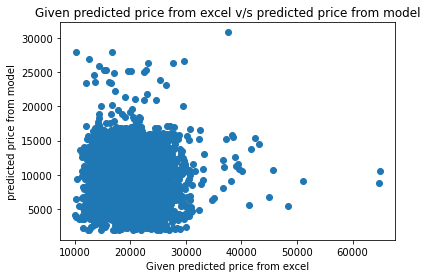

In [93]:
#Plotting the data-pred vs predicted_data
plt.scatter(predicted_data,data_pred)
plt.xlabel('Given predicted price from excel')
plt.ylabel(' predicted price from model ')
plt.title('Given predicted price from excel v/s predicted price from model')
plt.show()

In [94]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle7'
pickle.dump(rf,open('finalized_model.pickle7','wb'))